## Import necessary packages

In [2]:
from wine_quality_v1.data_preparation.data_preparation import get_wine_dataset_uci
from wine_quality_v1.utils.utils import read_set
from wine_quality_v1.utils.utils import read_pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [ ]:
# get dataset and metadata
df, metadata = get_wine_dataset_uci()

In [4]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

<Axes: xlabel='quality'>

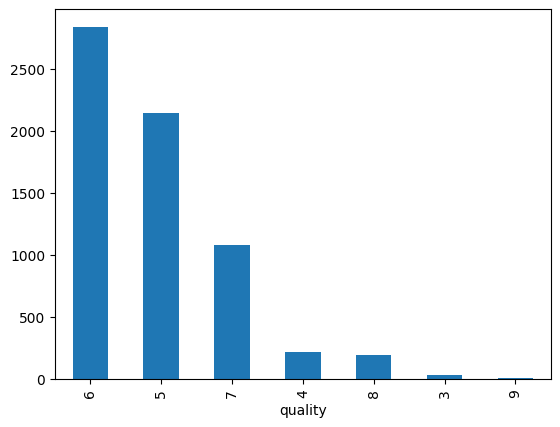

In [5]:
df["quality"].value_counts().plot(kind='bar')

We observe a significant imbalance in this dataset, with samples corresponding to quality 6 and 5 outnumbering the rest of the classes. Therefore, for this problem, transforming it into a binary classification would be ideal. In this scenario, there would be only two classes: 1 (representing good quality) for classes greater than 5, and 0 (representing bad quality) for classes equal to or lower than 5.

In [6]:
# create binary target variable
df["quality_"] = df["quality"].apply(lambda x: 1 if x > 5 else 0)

In [7]:
df["quality_"].value_counts()

quality_
1    4113
0    2384
Name: count, dtype: int64

Now the classes are more balanced.

## Outlier Detection

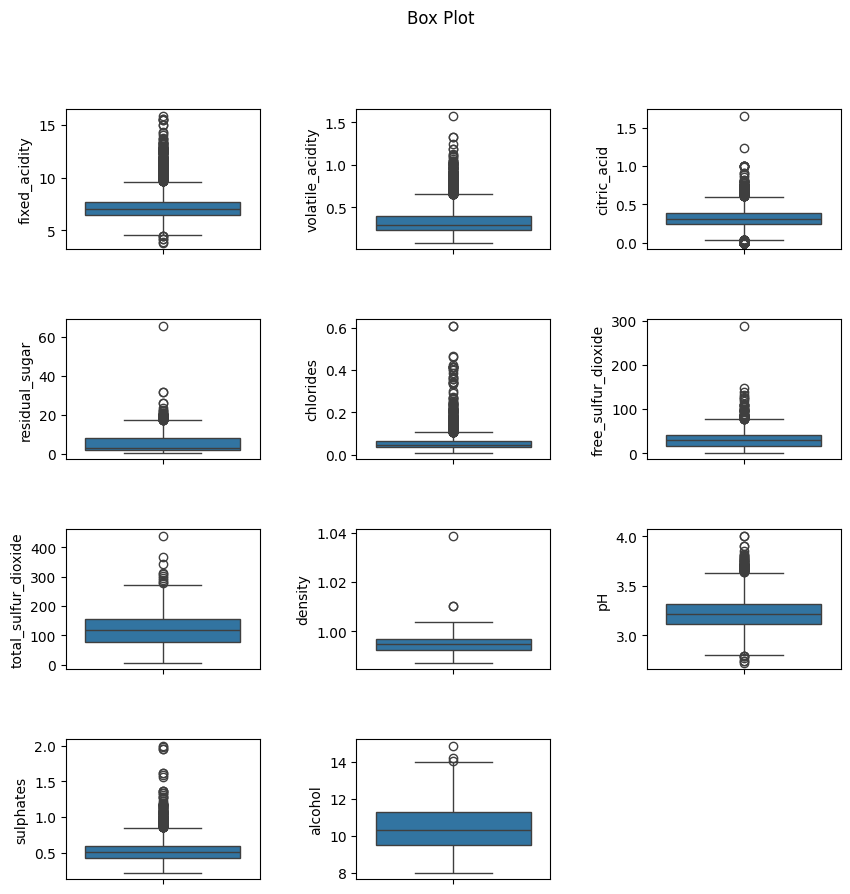

In [8]:
fig = plt.figure(figsize=(10, 10))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[2, 2, 2], wspace=0.5,
                         hspace=0.5, height_ratios=[1, 1, 1,1])
fig.suptitle('Box Plot')
 
for i, feature in enumerate(metadata["numerical_features"]):
    ax = fig.add_subplot(spec[i//3, i%3])
    sns.boxplot(ax=ax, data=df, y=feature)


We can observe that many features contain outliers. To improve the quality of the data, we will use the interquartile method to remove outliers.

In [9]:
def replace_outlier(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = df[feature].median()
    df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = median
    return df

In [10]:
for feature in metadata["numerical_features"]:
    clean_df = replace_outlier(df, feature)

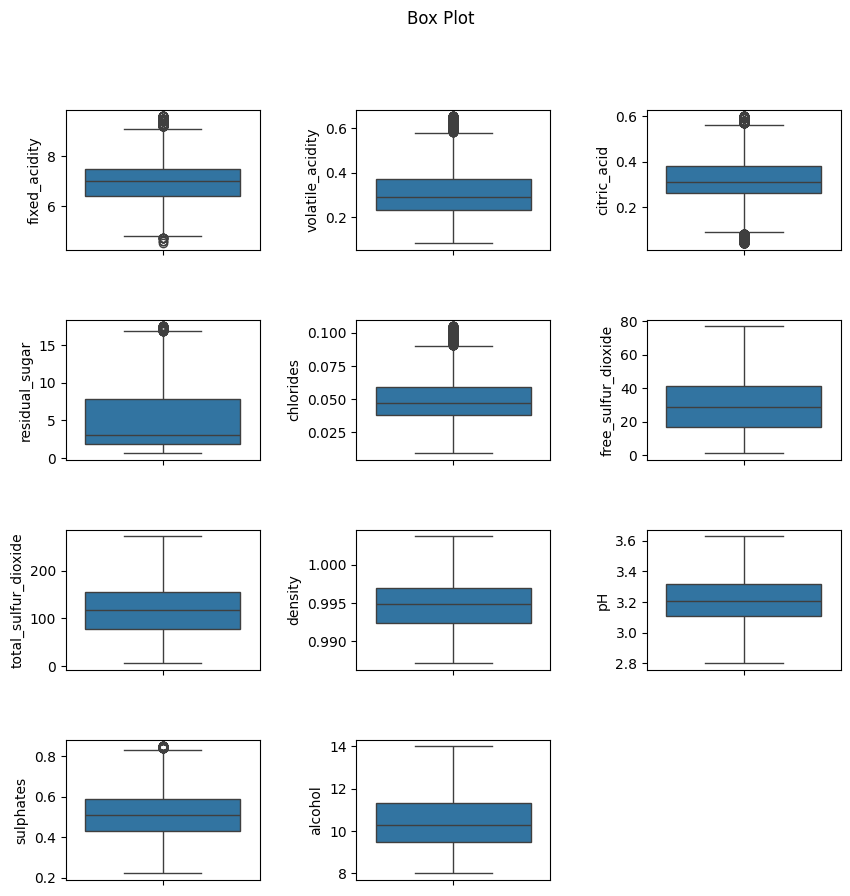

In [11]:
fig = plt.figure(figsize=(10, 10))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[2, 2, 2], wspace=0.5,
                         hspace=0.5, height_ratios=[1, 1, 1,1])
fig.suptitle('Box Plot')
 
for i, feature in enumerate(metadata["numerical_features"]):
    ax = fig.add_subplot(spec[i//3, i%3])
    sns.boxplot(ax=ax, data=clean_df, y=feature)

Now, after applying the interquartile method to remove outliers, the dataset appears to be in better shape. This method will be implemented in the wine_quality package.